In [1]:
import numpy as np
import multiprocessing as mp
from tqdm import tqdm

print("Number of processors: ", mp.cpu_count())
stat_cycle_num =  3

Number of processors:  12


In [4]:
import sympy as sp
from examples.comparisons import system

sp.init_printing()

system.equations

In [5]:
from examples.comparisons import ql_bfs_stat

bfs_steps = list()
for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
    with mp.Pool(mp.cpu_count()) as pool:
        bfs_steps_cur = pool.map(ql_bfs_stat, range(mp.cpu_count()))
        bfs_steps += bfs_steps_cur

bfs_steps

Cycle num: 100%|███████████████████████████████████████████████████████████████████████| 3/3 [33:11<00:00, 663.96s/run]


In [6]:
print("BFS steps statistics:")
print(f"Range: [{np.min(bfs_steps)}, {np.max(bfs_steps)}]")
print("Mean: ", np.mean(bfs_steps))
print("Median: ", np.median(bfs_steps))
print("Standard deviation: ", np.std(bfs_steps))

BFS steps statistics:
Range: [21, 292]
Mean:  161.30555555555554
Median:  171.5
Standard deviation:  95.2907304120875


In [7]:
from examples.comparisons import ql_iddfs_1_stat

iddfs_1_steps = list()
for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
    with mp.Pool(mp.cpu_count()) as pool:
        iddfs_1_steps_cur = pool.map(ql_iddfs_1_stat, range(mp.cpu_count()))
        iddfs_1_steps += iddfs_1_steps_cur

iddfs_1_steps

Cycle num: 100%|███████████████████████████████████████████████████████████████████████| 3/3 [31:02<00:00, 620.81s/run]


In [8]:
print("ID-DFS from 1 depth - steps statistics:")
print(f"Range: [{np.min(iddfs_1_steps)}, {np.max(iddfs_1_steps)}]")
print("Mean: ", np.mean(iddfs_1_steps))
print("Median: ", np.median(iddfs_1_steps))
print("Standard deviation: ", np.std(iddfs_1_steps))

ID-DFS from 1 depth - steps statistics:
Range: [21, 265]
Mean:  147.94444444444446
Median:  159.0
Standard deviation:  69.8943426594919


In [9]:
from examples.comparisons import ql_iddfs_2_stat

iddfs_2_steps = list()
for _ in tqdm(range(stat_cycle_num), desc="Cycle num", unit="run"):
    with mp.Pool(mp.cpu_count()) as pool:
        iddfs_2_steps_cur = pool.map(ql_iddfs_2_stat, range(mp.cpu_count()))
        iddfs_2_steps += iddfs_2_steps_cur

iddfs_2_steps

Cycle num: 100%|███████████████████████████████████████████████████████████████████████| 3/3 [33:32<00:00, 670.99s/run]


In [10]:
print("ID-DFS from 2 depth - steps statistics:")
print(f"Range: [{np.min(iddfs_2_steps)}, {np.max(iddfs_2_steps)}]")
print("Mean: ", np.mean(iddfs_2_steps))
print("Median: ", np.median(iddfs_2_steps))
print("Standard deviation: ", np.std(iddfs_2_steps))

ID-DFS from 2 depth - steps statistics:
Range: [26, 291]
Mean:  161.13888888888889
Median:  157.5
Standard deviation:  74.56360177644682


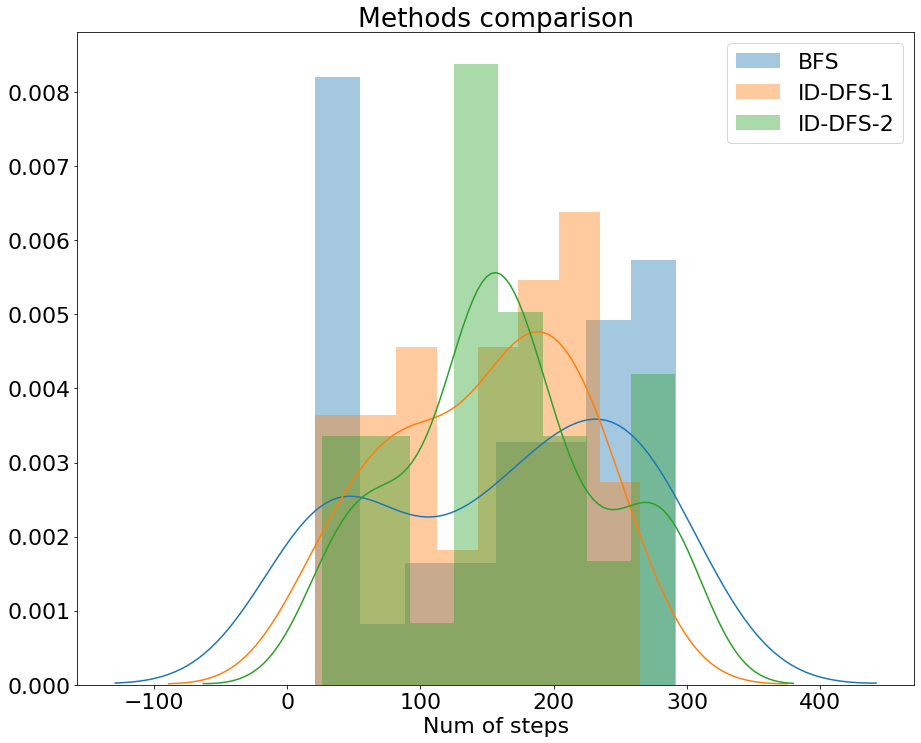

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))
sns.distplot(bfs_steps, label="BFS", bins=8, kde=True)
sns.distplot(iddfs_1_steps,  label="ID-DFS-1", bins=8, kde=True)
sns.distplot(iddfs_2_steps,  label="ID-DFS-2", bins=8, kde=True)
plt.legend()
plt.xlabel("Num of steps")
plt.title("Methods comparison");

